In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

In [20]:
data = pd.read_csv('world-happiness-report-2021.csv')

In [21]:
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [22]:
data_columns = ['Country name', 'Regional indicator', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']  

In [23]:
data = data[data_columns].copy()

In [26]:
happy_df = data.rename(columns={'Country name': 'country_name', 'Regional indicator': 'regional_indicator', 'Ladder score': 'happiness_score', 'Logged GDP per capita': 'gdp_per_capita', 'Social support': 'social_support', 'Healthy life expectancy': 'life_expectancy', 'Freedom to make life choices': 'freedom_to_make_life_choices', 'Generosity': 'generosity', 'Perceptions of corruption': 'perceptions_of_corruption'})

In [27]:
happy_df.head()

,country_name,regional_indicator,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [28]:
happy_df.isnull().sum()

country_name                    0
regional_indicator              0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
life_expectancy                 0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

Text(0, 0.5, 'Logged GDP per capita')

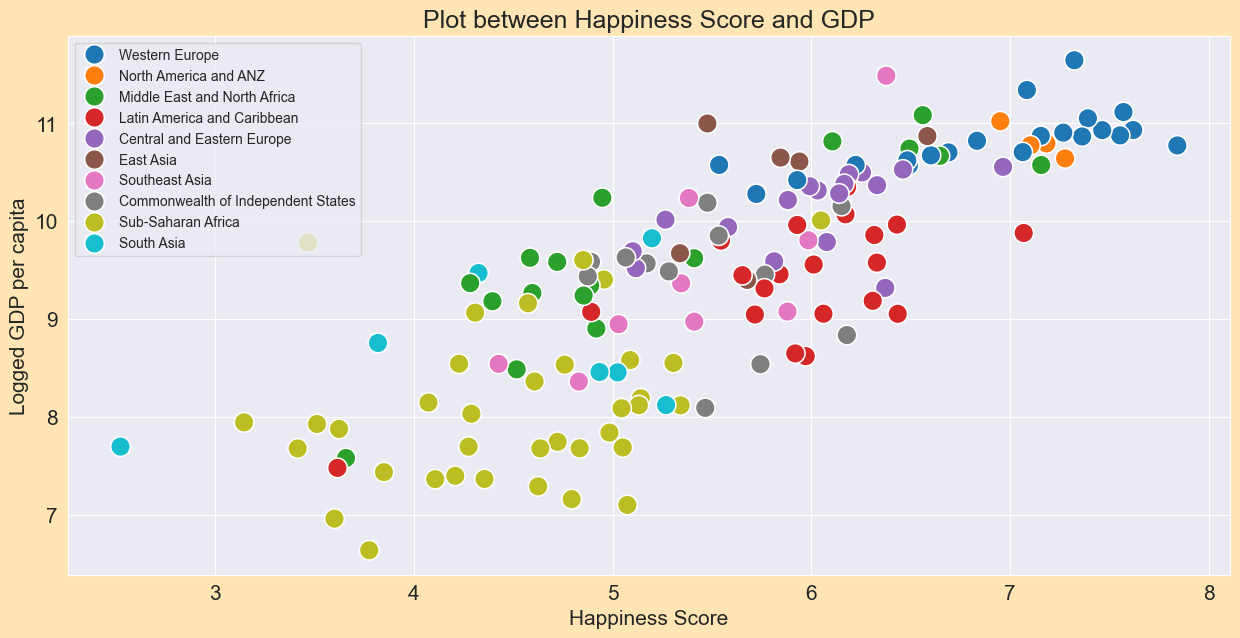

In [29]:
#PLOT BETWEEN HAPPINESS SCORE AND GDP

plt.rcParams['figure.figsize'] = (15,7)
plt.title('Plot between Happiness Score and GDP')
sns.scatterplot(x = happy_df.happiness_score, y = happy_df.gdp_per_capita, hue = happy_df.regional_indicator, s=200);
plt.legend(loc = 'upper left', fontsize = '10')
plt.xlabel('Happiness Score')
plt.ylabel('Logged GDP per capita')

In [44]:
gdp_region = happy_df.groupby('regional_indicator')['gdp_per_capita'].sum()
gdp_region

regional_indicator
Central and Eastern Europe            171.854
Commonwealth of Independent States    112.822
East Asia                              62.206
Latin America and Caribbean           187.400
Middle East and North Africa          164.324
North America and ANZ                  43.238
South Asia                             60.778
Southeast Asia                         84.793
Sub-Saharan Africa                    290.707
Western Europe                        227.277
Name: gdp_per_capita, dtype: float64

Text(0, 0.5, ' ')

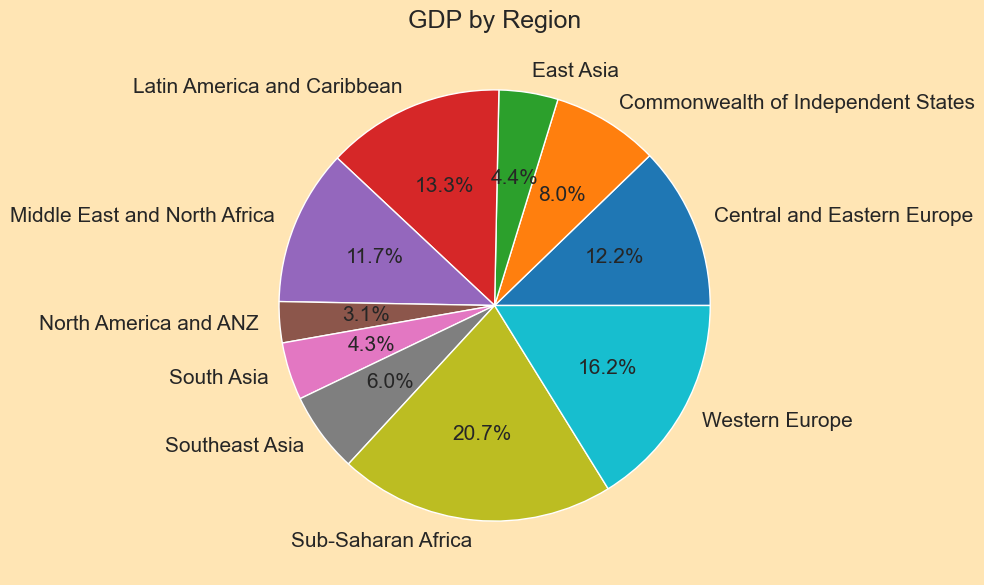

In [45]:
gdp_region.plot.pie(autopct = '%1.1f%%')
plt.title('GDP by Region')
plt.ylabel(' ')

In [46]:
# TOTAL COUNTRIES
total_country = happy_df.groupby('regional_indicator')[['country_name']].count()
print(total_country)

                                    country_name
regional_indicator                              
Central and Eastern Europe                    17
Commonwealth of Independent States            12
East Asia                                      6
Latin America and Caribbean                   20
Middle East and North Africa                  17
North America and ANZ                          4
South Asia                                     7
Southeast Asia                                 9
Sub-Saharan Africa                            36
Western Europe                                21


<Axes: >

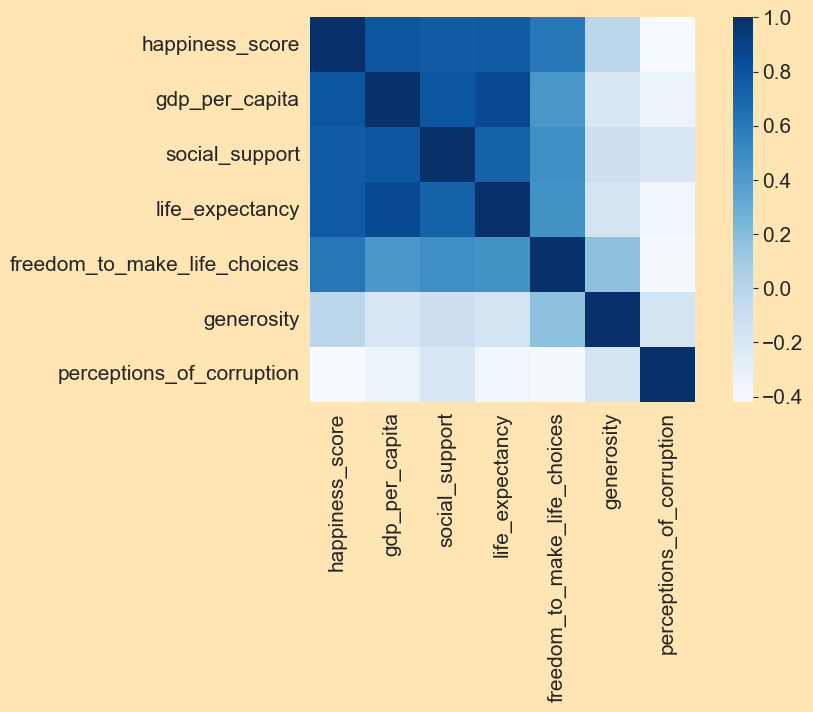

In [49]:
# CORRELATION MAP

numeric_df = happy_df.select_dtypes(include=np.number)
cor = numeric_df.corr(method="pearson")

#cor = happy_df.corr(method="pearson")
f, ax = plt.subplots(figsize = (10,5))
sns.heatmap(cor, mask = np.zeros_like(cor, dtype=np.bool),
            cmap="Blues", square=True, ax=ax)

In [53]:
# CORRUPTION IN REGIONS
corruption = happy_df.groupby('regional_indicator')[['perceptions_of_corruption']].mean()
corruption

,perceptions_of_corruption
regional_indicator,
Central and Eastern Europe,0.850529
Commonwealth of Independent States,0.725083
East Asia,0.683333
Latin America and Caribbean,0.792600
Middle East and North Africa,0.762235
North America and ANZ,0.449250
South Asia,0.797429
Southeast Asia,0.709111
Sub-Saharan Africa,0.765944


<function matplotlib.pyplot.show(close=None, block=None)>

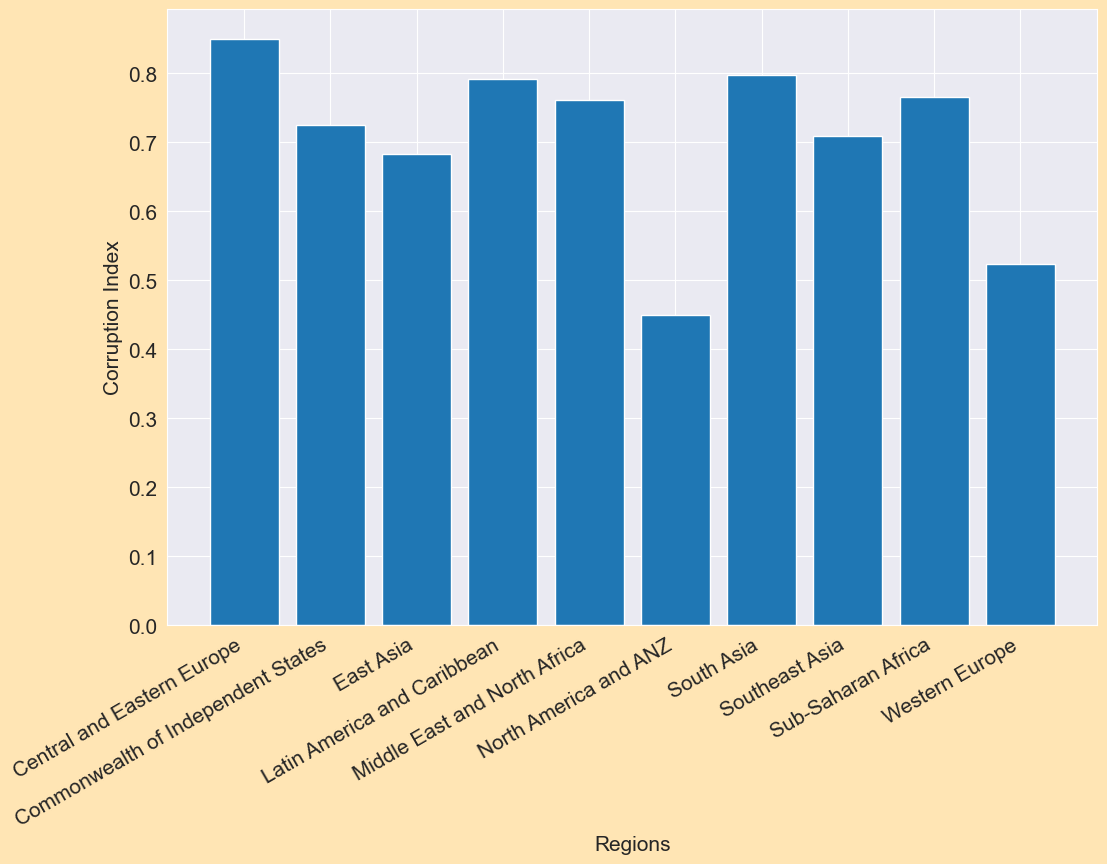

In [70]:
plt.rcParams['figure.figsize'] = (12,8)
#plt.title ("Perceptions of Corruption in Various Regions")
plt.xlabel ("Regions", fontsize = 15)
plt.ylabel ("Corruption Index", fontsize = 15)
plt.xticks(rotation = 30, ha = 'right')
plt.bar(corruption.index, corruption.perceptions_of_corruption)
plt.show

In [72]:
top_10 =happy_df.head(10)
bottom_10 = happy_df.tail(10)

C:\Users\kamya\AppData\Local\Temp\ipykernel_29752\792795349.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(xlabels, rotation = 45, ha='right')
C:\Users\kamya\AppData\Local\Temp\ipykernel_29752\792795349.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(xlabels, rotation = 45, ha='right')


Text(831.8358585858584, 0.5, 'Life Expectancy')

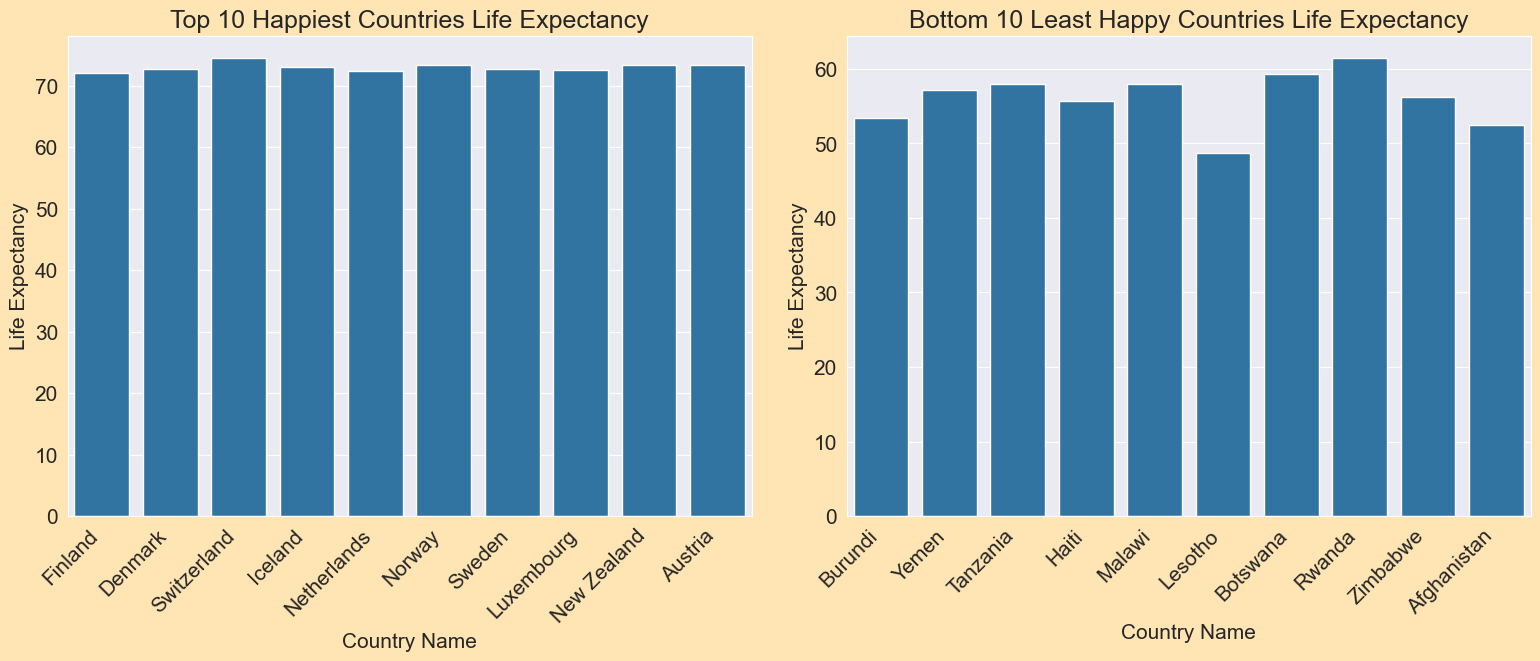

In [78]:
fig, axes = plt.subplots(1, 2, figsize = (16, 6))
plt.tight_layout(pad = 2)
xlabels = top_10.country_name
axes[0].set_title('Top 10 Happiest Countries Life Expectancy')
axes[0].set_xticklabels(xlabels, rotation = 45, ha='right')
sns.barplot(x = top_10.country_name, y = top_10.life_expectancy, ax = axes[0])
axes[0].set_xlabel('Country Name')
axes[0].set_ylabel('Life Expectancy')

xlabels = bottom_10.country_name
axes[1].set_title('Bottom 10 Least Happy Countries Life Expectancy')
axes[1].set_xticklabels(xlabels, rotation = 45, ha='right')
sns.barplot(x = bottom_10.country_name, y = bottom_10.life_expectancy, ax = axes[1])
axes[1].set_xlabel('Country Name')
axes[1].set_ylabel('Life Expectancy')

Text(0, 0.5, 'Happiness Score')

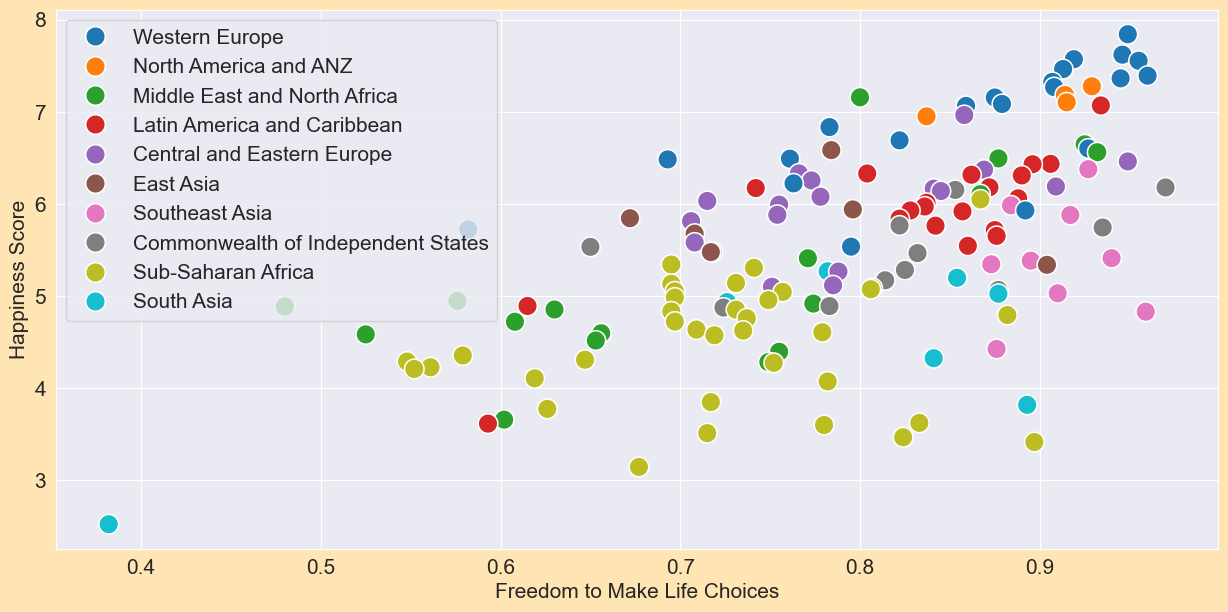

In [81]:
plt.rcParams['figure.figsize'] = (15,7)
sns.scatterplot(x = happy_df.freedom_to_make_life_choices, y = happy_df.happiness_score, hue = happy_df.regional_indicator, s=200);
plt.legend(loc = 'upper left', fontsize = 15)
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')

<BarContainer object of 10 artists>

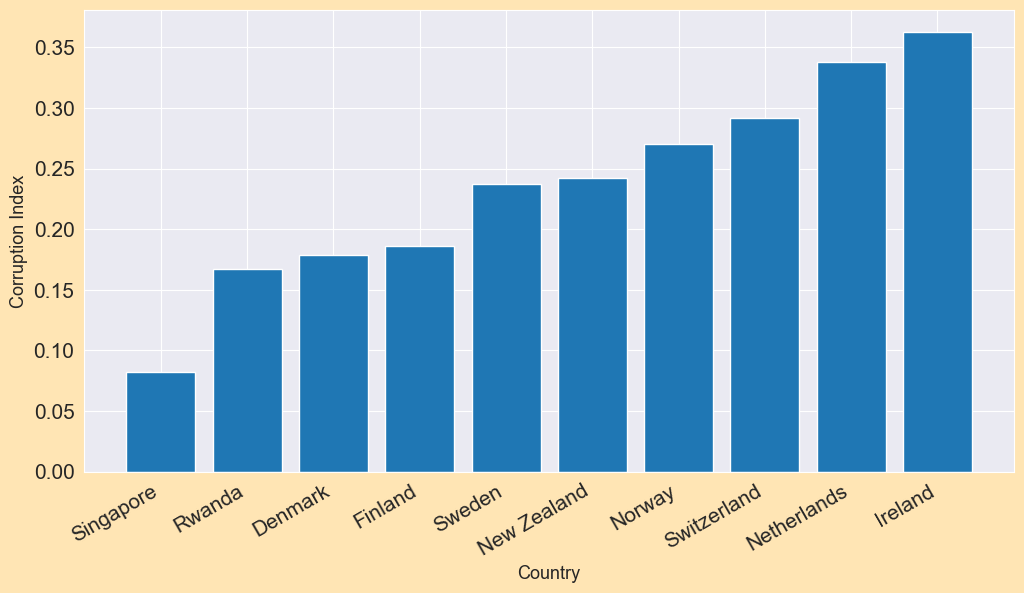

In [88]:
# Countries with least perceptions of corruption
country = happy_df.sort_values(by = 'perceptions_of_corruption').head(10)
plt.rcParams['figure.figsize'] =  (12,6)
#plt.title('Countries with Least Perceptions of Corruption')
plt.xlabel('Country', fontsize = 13)
plt.ylabel('Corruption Index', fontsize = 13)
plt.xticks(rotation = 30, ha = 'right')
plt.bar(country.country_name, country.perceptions_of_corruption)

<BarContainer object of 10 artists>

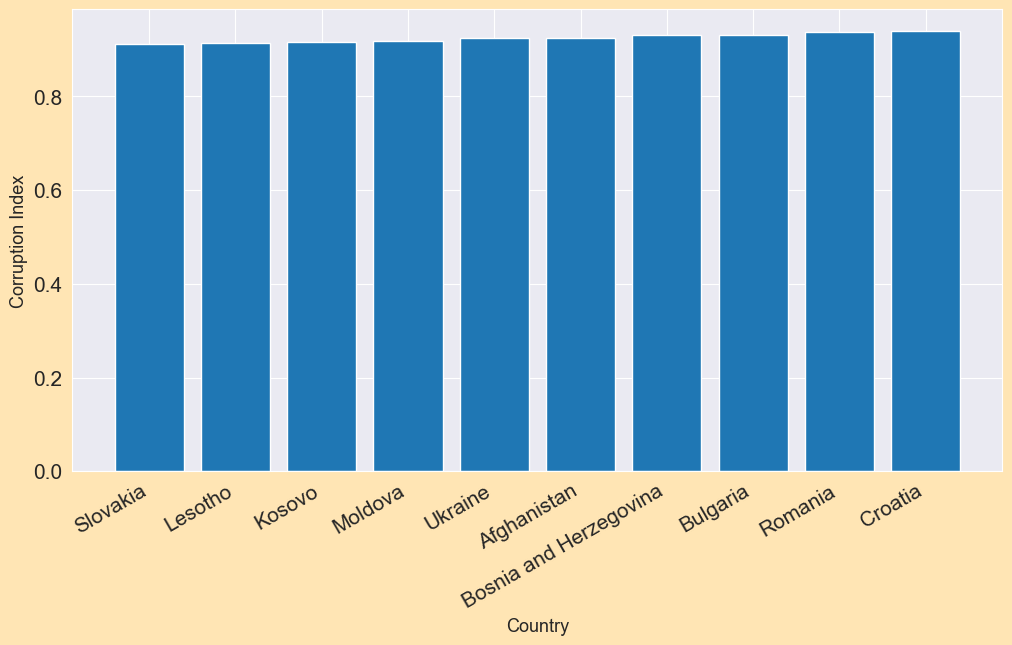

In [89]:
# Countries with most perceptions of corruption
country = happy_df.sort_values(by = 'perceptions_of_corruption').tail(10)
plt.rcParams['figure.figsize'] =  (12,6)
#plt.title('Countries with Most Perceptions of Corruption')
plt.xlabel('Country', fontsize = 13)
plt.ylabel('Corruption Index', fontsize = 13)
plt.xticks(rotation = 30, ha = 'right')
plt.bar(country.country_name, country.perceptions_of_corruption)

Text(0.5, 0, 'Happiness Score')

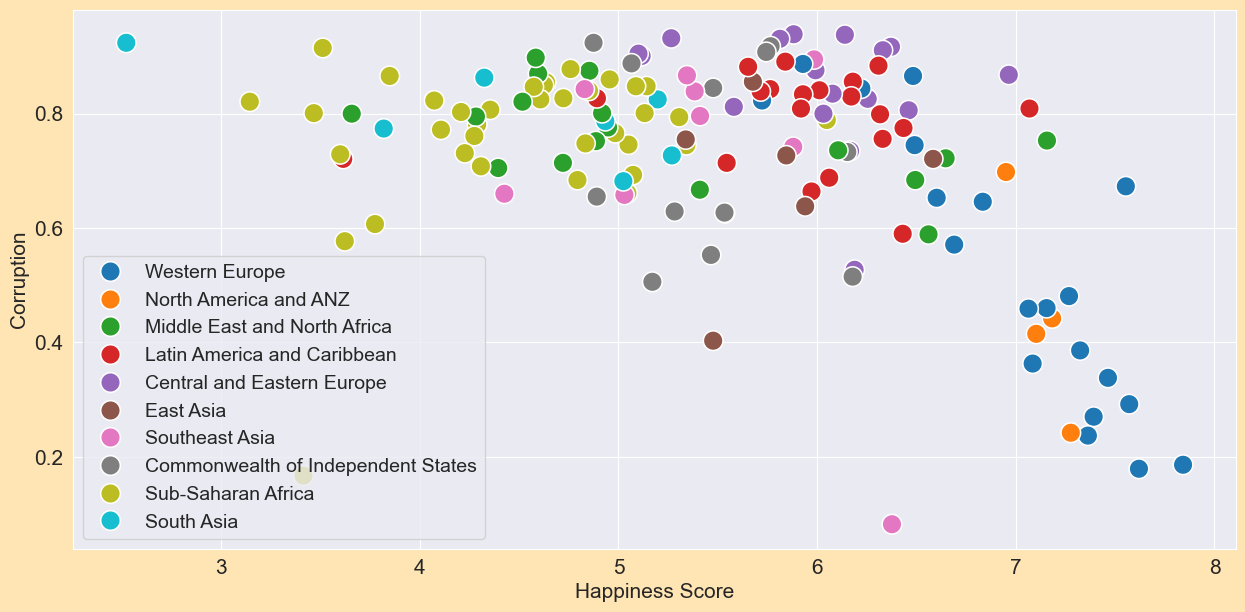

In [91]:
# CORRUPTION v/s HAPPINESS

plt.rcParams['figure.figsize'] = (15,7)
sns.scatterplot(x = happy_df.happiness_score, y = happy_df.perceptions_of_corruption, hue=happy_df.regional_indicator, s = 200)
plt.legend(loc = 'lower left', fontsize = 14)
plt.ylabel('Corruption')
plt.xlabel('Happiness Score')